In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원
from tensorflow.keras.models import load_model

# epoch 마다 저장하기 위해 사용
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기중단을 위해 사용
from tensorflow.keras.callbacks import EarlyStopping

# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
df1 = pd.read_csv('data/housing.csv', header=None, delim_whitespace=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [8]:
# 입력과 결과로 나눈다.
X = df1.drop(13, axis=1)
y = df1[13]

display(X)
display(y)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [9]:
# 데이터 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [11]:
# 모델 설정
model = Sequential()

a1 = X.shape[1]

model.add(Dense(30, input_dim=a1))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

# 회귀를 출력층에 활성 함수를 두지 않는다.
model.add(Dense(1))


In [12]:
# 학습 모델을 생성한다.
# 손실 함수를 mean_squared_error로 설정한다.
model.compile(loss='mean_squared_error', optimizer='adam')


In [13]:
# 모델들이 저장될 파일명
# epoch : 학습 횟수
# val_loss : 검증 데이터 손실률
path1 = 'model/21/{epoch}-{val_loss}.h5'
path2 = 'model/21/최종.h5'

# 저장 콜백 설정
# save_best_only : True로 설정하면 개선이 되었을 때만 저장한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                        save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss',
                        save_best_only=True)

# 조기 중단 콜백
# patience: 개선이 된 이후 몇 번을 더 볼 것인가를 설정.
# 이 횟수 동안 개선이 되지 않으면 중단.
call3 = EarlyStopping(monitor = 'val_loss', patience=50)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1)

In [15]:
# 학습한다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
          validation_data=[X_test, y_test],
          callbacks=[call1, call2, call3])

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 606.8951 - val_loss: 621.5583
Epoch 2/2000
1/1 [==============================] - 0s 71ms/step - loss: 604.9511 - val_loss: 619.7889
Epoch 3/2000
1/1 [==============================] - 0s 66ms/step - loss: 603.0263 - val_loss: 618.0300
Epoch 4/2000
1/1 [==============================] - 0s 70ms/step - loss: 601.1300 - val_loss: 616.2939
Epoch 5/2000
1/1 [==============================] - 0s 70ms/step - loss: 599.2615 - val_loss: 614.5685
Epoch 6/2000
1/1 [==============================] - 0s 68ms/step - loss: 597.4074 - val_loss: 612.8599
Epoch 7/2000
1/1 [==============================] - 0s 67ms/step - loss: 595.5687 - val_loss: 611.1617
Epoch 8/2000
1/1 [==============================] - 0s 71ms/step - loss: 593.7413 - val_loss: 609.4612
Epoch 9/2000
1/1 [==============================] - 0s 65ms/step - loss: 591.9319 - val_loss: 607.7820
Epoch 10/2000
1/1 [==============================] - 0s 64ms/step - loss: 5

Epoch 80/2000
1/1 [==============================] - 0s 72ms/step - loss: 418.7844 - val_loss: 436.7779
Epoch 81/2000
1/1 [==============================] - 0s 76ms/step - loss: 414.5340 - val_loss: 432.5709
Epoch 82/2000
1/1 [==============================] - 0s 74ms/step - loss: 410.2241 - val_loss: 428.3058
Epoch 83/2000
1/1 [==============================] - 0s 75ms/step - loss: 405.8449 - val_loss: 423.9777
Epoch 84/2000
1/1 [==============================] - 0s 73ms/step - loss: 401.4039 - val_loss: 419.5898
Epoch 85/2000
1/1 [==============================] - 0s 69ms/step - loss: 396.9017 - val_loss: 415.1471
Epoch 86/2000
1/1 [==============================] - 0s 71ms/step - loss: 392.3357 - val_loss: 410.6406
Epoch 87/2000
1/1 [==============================] - 0s 69ms/step - loss: 387.7086 - val_loss: 406.0777
Epoch 88/2000
1/1 [==============================] - 0s 70ms/step - loss: 383.0260 - val_loss: 401.4570
Epoch 89/2000
1/1 [==============================] - 0s 70ms/ste

1/1 [==============================] - 0s 62ms/step - loss: 30.2225 - val_loss: 33.2581
Epoch 238/2000
1/1 [==============================] - 0s 62ms/step - loss: 29.9443 - val_loss: 32.8989
Epoch 239/2000
1/1 [==============================] - 0s 62ms/step - loss: 29.6726 - val_loss: 32.5468
Epoch 240/2000
1/1 [==============================] - 0s 69ms/step - loss: 29.4073 - val_loss: 32.2025
Epoch 241/2000
1/1 [==============================] - 0s 64ms/step - loss: 29.1481 - val_loss: 31.8655
Epoch 242/2000
1/1 [==============================] - 0s 71ms/step - loss: 28.8950 - val_loss: 31.5355
Epoch 243/2000
1/1 [==============================] - 0s 71ms/step - loss: 28.6481 - val_loss: 31.2132
Epoch 244/2000
1/1 [==============================] - 0s 68ms/step - loss: 28.4067 - val_loss: 30.8981
Epoch 245/2000
1/1 [==============================] - 0s 69ms/step - loss: 28.1712 - val_loss: 30.5907
Epoch 246/2000
1/1 [==============================] - 0s 67ms/step - loss: 27.9414 - val

1/1 [==============================] - 0s 65ms/step - loss: 16.9464 - val_loss: 16.6639
Epoch 396/2000
1/1 [==============================] - 0s 67ms/step - loss: 16.9167 - val_loss: 16.6356
Epoch 397/2000
1/1 [==============================] - 0s 62ms/step - loss: 16.8872 - val_loss: 16.6074
Epoch 398/2000
1/1 [==============================] - 0s 66ms/step - loss: 16.8578 - val_loss: 16.5795
Epoch 399/2000
1/1 [==============================] - 0s 68ms/step - loss: 16.8287 - val_loss: 16.5518
Epoch 400/2000
1/1 [==============================] - 0s 65ms/step - loss: 16.7996 - val_loss: 16.5245
Epoch 401/2000
1/1 [==============================] - 0s 64ms/step - loss: 16.7707 - val_loss: 16.4975
Epoch 402/2000
1/1 [==============================] - 0s 65ms/step - loss: 16.7419 - val_loss: 16.4708
Epoch 403/2000
1/1 [==============================] - 0s 68ms/step - loss: 16.7133 - val_loss: 16.4444
Epoch 404/2000
1/1 [==============================] - 0s 64ms/step - loss: 16.6849 - val

1/1 [==============================] - 0s 70ms/step - loss: 13.5278 - val_loss: 13.5512
Epoch 554/2000
1/1 [==============================] - 0s 69ms/step - loss: 13.5123 - val_loss: 13.5356
Epoch 555/2000
1/1 [==============================] - 0s 66ms/step - loss: 13.4970 - val_loss: 13.5195
Epoch 556/2000
1/1 [==============================] - 0s 69ms/step - loss: 13.4818 - val_loss: 13.5034
Epoch 557/2000
1/1 [==============================] - 0s 64ms/step - loss: 13.4668 - val_loss: 13.4872
Epoch 558/2000
1/1 [==============================] - 0s 63ms/step - loss: 13.4519 - val_loss: 13.4710
Epoch 559/2000
1/1 [==============================] - 0s 67ms/step - loss: 13.4370 - val_loss: 13.4548
Epoch 560/2000
1/1 [==============================] - 0s 62ms/step - loss: 13.4222 - val_loss: 13.4391
Epoch 561/2000
1/1 [==============================] - 0s 68ms/step - loss: 13.4074 - val_loss: 13.4239
Epoch 562/2000
1/1 [==============================] - 0s 68ms/step - loss: 13.3929 - val

1/1 [==============================] - 0s 62ms/step - loss: 11.7602 - val_loss: 11.7891
Epoch 712/2000
1/1 [==============================] - 0s 65ms/step - loss: 11.7514 - val_loss: 11.7817
Epoch 713/2000
1/1 [==============================] - 0s 65ms/step - loss: 11.7424 - val_loss: 11.7751
Epoch 714/2000
1/1 [==============================] - 0s 67ms/step - loss: 11.7335 - val_loss: 11.7682
Epoch 715/2000
1/1 [==============================] - 0s 64ms/step - loss: 11.7248 - val_loss: 11.7603
Epoch 716/2000
1/1 [==============================] - 0s 75ms/step - loss: 11.7160 - val_loss: 11.7516
Epoch 717/2000
1/1 [==============================] - 0s 65ms/step - loss: 11.7069 - val_loss: 11.7421
Epoch 718/2000
1/1 [==============================] - 0s 62ms/step - loss: 11.6980 - val_loss: 11.7335
Epoch 719/2000
1/1 [==============================] - 0s 67ms/step - loss: 11.6893 - val_loss: 11.7259
Epoch 720/2000
1/1 [==============================] - 0s 65ms/step - loss: 11.6805 - val

1/1 [==============================] - 0s 72ms/step - loss: 10.5732 - val_loss: 10.8395
Epoch 870/2000
1/1 [==============================] - 0s 65ms/step - loss: 10.5667 - val_loss: 10.8346
Epoch 871/2000
1/1 [==============================] - 0s 68ms/step - loss: 10.5601 - val_loss: 10.8300
Epoch 872/2000
1/1 [==============================] - 0s 69ms/step - loss: 10.5534 - val_loss: 10.8256
Epoch 873/2000
1/1 [==============================] - 0s 64ms/step - loss: 10.5468 - val_loss: 10.8211
Epoch 874/2000
1/1 [==============================] - 0s 65ms/step - loss: 10.5402 - val_loss: 10.8164
Epoch 875/2000
1/1 [==============================] - ETA: 0s - loss: 10.53 - 0s 66ms/step - loss: 10.5336 - val_loss: 10.8115
Epoch 876/2000
1/1 [==============================] - 0s 64ms/step - loss: 10.5268 - val_loss: 10.8064
Epoch 877/2000
1/1 [==============================] - 0s 79ms/step - loss: 10.5202 - val_loss: 10.8020
Epoch 878/2000
1/1 [==============================] - 0s 61ms/st

Epoch 1028/2000
1/1 [==============================] - 0s 68ms/step - loss: 9.5955 - val_loss: 10.4209
Epoch 1029/2000
1/1 [==============================] - 0s 101ms/step - loss: 9.5901 - val_loss: 10.4177
Epoch 1030/2000
1/1 [==============================] - 0s 70ms/step - loss: 9.5847 - val_loss: 10.4144
Epoch 1031/2000
1/1 [==============================] - 0s 65ms/step - loss: 9.5791 - val_loss: 10.4113
Epoch 1032/2000
1/1 [==============================] - 0s 63ms/step - loss: 9.5737 - val_loss: 10.4086
Epoch 1033/2000
1/1 [==============================] - 0s 68ms/step - loss: 9.5682 - val_loss: 10.4058
Epoch 1034/2000
1/1 [==============================] - 0s 66ms/step - loss: 9.5627 - val_loss: 10.4029
Epoch 1035/2000
1/1 [==============================] - 0s 62ms/step - loss: 9.5572 - val_loss: 10.3997
Epoch 1036/2000
1/1 [==============================] - 0s 62ms/step - loss: 9.5518 - val_loss: 10.3972
Epoch 1037/2000
1/1 [==============================] - 0s 66ms/step - lo

1/1 [==============================] - 0s 67ms/step - loss: 8.7781 - val_loss: 10.0808
Epoch 1187/2000
1/1 [==============================] - 0s 66ms/step - loss: 8.7736 - val_loss: 10.0785
Epoch 1188/2000
1/1 [==============================] - 0s 86ms/step - loss: 8.7690 - val_loss: 10.0760
Epoch 1189/2000
1/1 [==============================] - 0s 64ms/step - loss: 8.7643 - val_loss: 10.0741
Epoch 1190/2000
1/1 [==============================] - 0s 67ms/step - loss: 8.7597 - val_loss: 10.0722
Epoch 1191/2000
1/1 [==============================] - 0s 68ms/step - loss: 8.7552 - val_loss: 10.0703
Epoch 1192/2000
1/1 [==============================] - 0s 66ms/step - loss: 8.7506 - val_loss: 10.0691
Epoch 1193/2000
1/1 [==============================] - 0s 62ms/step - loss: 8.7460 - val_loss: 10.0685
Epoch 1194/2000
1/1 [==============================] - 0s 65ms/step - loss: 8.7415 - val_loss: 10.0677
Epoch 1195/2000
1/1 [==============================] - 0s 65ms/step - loss: 8.7369 - val_

Epoch 1266/2000
1/1 [==============================] - 0s 67ms/step - loss: 8.4149 - val_loss: 9.9569
Epoch 1267/2000
1/1 [==============================] - 0s 72ms/step - loss: 8.4101 - val_loss: 9.9554
Epoch 1268/2000
1/1 [==============================] - 0s 67ms/step - loss: 8.4053 - val_loss: 9.9539
Epoch 1269/2000
1/1 [==============================] - 0s 72ms/step - loss: 8.4005 - val_loss: 9.9526
Epoch 1270/2000
1/1 [==============================] - 0s 66ms/step - loss: 8.3958 - val_loss: 9.9512
Epoch 1271/2000
1/1 [==============================] - 0s 79ms/step - loss: 8.3911 - val_loss: 9.9503
Epoch 1272/2000
1/1 [==============================] - 0s 63ms/step - loss: 8.3862 - val_loss: 9.9502
Epoch 1273/2000
1/1 [==============================] - 0s 26ms/step - loss: 8.3814 - val_loss: 9.9506
Epoch 1274/2000
1/1 [==============================] - 0s 25ms/step - loss: 8.3765 - val_loss: 9.9513
Epoch 1275/2000
1/1 [==============================] - 0s 24ms/step - loss: 8.3720

1/1 [==============================] - 0s 63ms/step - loss: 7.6368 - val_loss: 9.7951
Epoch 1427/2000
1/1 [==============================] - 0s 62ms/step - loss: 7.6324 - val_loss: 9.7934
Epoch 1428/2000
1/1 [==============================] - 0s 62ms/step - loss: 7.6277 - val_loss: 9.7916
Epoch 1429/2000
1/1 [==============================] - 0s 60ms/step - loss: 7.6231 - val_loss: 9.7912
Epoch 1430/2000
1/1 [==============================] - 0s 65ms/step - loss: 7.6187 - val_loss: 9.7908
Epoch 1431/2000
1/1 [==============================] - 0s 62ms/step - loss: 7.6141 - val_loss: 9.7896
Epoch 1432/2000
1/1 [==============================] - 0s 63ms/step - loss: 7.6099 - val_loss: 9.7866
Epoch 1433/2000
1/1 [==============================] - 0s 75ms/step - loss: 7.6055 - val_loss: 9.7836
Epoch 1434/2000
1/1 [==============================] - 0s 61ms/step - loss: 7.6011 - val_loss: 9.7807
Epoch 1435/2000
1/1 [==============================] - 0s 66ms/step - loss: 7.5965 - val_loss: 9.7

1/1 [==============================] - 0s 63ms/step - loss: 7.0260 - val_loss: 9.6359
Epoch 1587/2000
1/1 [==============================] - 0s 62ms/step - loss: 7.0226 - val_loss: 9.6285
Epoch 1588/2000
1/1 [==============================] - 0s 77ms/step - loss: 7.0191 - val_loss: 9.6236
Epoch 1589/2000
1/1 [==============================] - 0s 65ms/step - loss: 7.0159 - val_loss: 9.6213
Epoch 1590/2000
1/1 [==============================] - 0s 65ms/step - loss: 7.0125 - val_loss: 9.6182
Epoch 1591/2000
1/1 [==============================] - 0s 64ms/step - loss: 7.0092 - val_loss: 9.6172
Epoch 1592/2000
1/1 [==============================] - 0s 62ms/step - loss: 7.0058 - val_loss: 9.6156
Epoch 1593/2000
1/1 [==============================] - 0s 62ms/step - loss: 7.0024 - val_loss: 9.6146
Epoch 1594/2000
1/1 [==============================] - 0s 60ms/step - loss: 6.9991 - val_loss: 9.6110
Epoch 1595/2000
1/1 [==============================] - 0s 59ms/step - loss: 6.9959 - val_loss: 9.6

1/1 [==============================] - 0s 62ms/step - loss: 6.5041 - val_loss: 9.1372
Epoch 1747/2000
1/1 [==============================] - 0s 62ms/step - loss: 6.5010 - val_loss: 9.1356
Epoch 1748/2000
1/1 [==============================] - 0s 24ms/step - loss: 6.4980 - val_loss: 9.1360
Epoch 1749/2000
1/1 [==============================] - 0s 64ms/step - loss: 6.4952 - val_loss: 9.1349
Epoch 1750/2000
1/1 [==============================] - 0s 64ms/step - loss: 6.4926 - val_loss: 9.1291
Epoch 1751/2000
1/1 [==============================] - 0s 63ms/step - loss: 6.4891 - val_loss: 9.1250
Epoch 1752/2000
1/1 [==============================] - 0s 60ms/step - loss: 6.4864 - val_loss: 9.1232
Epoch 1753/2000
1/1 [==============================] - 0s 61ms/step - loss: 6.4835 - val_loss: 9.1226
Epoch 1754/2000
1/1 [==============================] - 0s 62ms/step - loss: 6.4805 - val_loss: 9.1174
Epoch 1755/2000
1/1 [==============================] - 0s 60ms/step - loss: 6.4776 - val_loss: 9.1

1/1 [==============================] - 0s 65ms/step - loss: 6.0412 - val_loss: 8.7429
Epoch 1907/2000
1/1 [==============================] - 0s 63ms/step - loss: 6.0385 - val_loss: 8.7312
Epoch 1908/2000
1/1 [==============================] - 0s 62ms/step - loss: 6.0358 - val_loss: 8.7233
Epoch 1909/2000
1/1 [==============================] - 0s 81ms/step - loss: 6.0331 - val_loss: 8.7183
Epoch 1910/2000
1/1 [==============================] - 0s 63ms/step - loss: 6.0303 - val_loss: 8.7157
Epoch 1911/2000
1/1 [==============================] - 0s 59ms/step - loss: 6.0272 - val_loss: 8.7144
Epoch 1912/2000
1/1 [==============================] - 0s 64ms/step - loss: 6.0242 - val_loss: 8.7108
Epoch 1913/2000
1/1 [==============================] - 0s 59ms/step - loss: 6.0213 - val_loss: 8.7088
Epoch 1914/2000
1/1 [==============================] - 0s 60ms/step - loss: 6.0185 - val_loss: 8.7081
Epoch 1915/2000
1/1 [==============================] - 0s 23ms/step - loss: 6.0154 - val_loss: 8.7

In [16]:
# 모델을 복원한다.
model2 = load_model(path2)
model2

In [19]:
a1 = model2.evaluate(X_test, y_test)
print(f'손실률 : {a1}')


4/4 [==============================] - 0s 4ms/step - loss: 8.4873
손실률 : 8.48727798461914


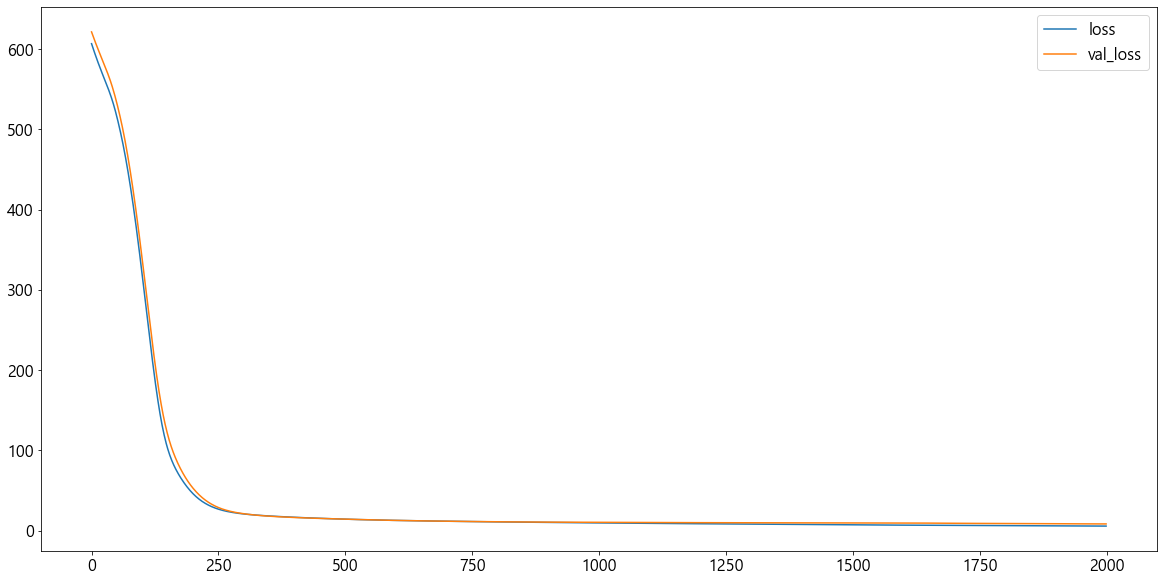

In [20]:
# 오차 정도를 그래프로 그린다.
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [21]:
# 예측을 한다. 결과가 2차원이라서 1차원으로 변경
pred1 = model.predict(X_test)
pred1 = pred1.flatten()
pred1


array([29.70939  , 21.015074 , 22.69244  , 20.636562 , 25.691753 ,
       20.999989 , 29.432104 , 16.212418 , 19.888147 , 25.42282  ,
       27.616001 , 26.927927 , 19.22973  , 16.520332 , 20.08645  ,
       29.305801 , 11.925164 , 50.700012 , 20.536839 , 14.484904 ,
       17.041098 , 17.084433 , 20.701612 , 23.988747 , 26.020391 ,
       11.899775 , 13.871152 , 20.361338 , 38.23127  , 14.666671 ,
       23.715311 , 16.182333 , 51.102077 , 14.524964 , 19.047434 ,
       22.609758 , 14.881581 , 31.328455 , 15.850621 , 17.091396 ,
       21.45656  , 23.315613 , 26.053032 , 13.743225 , 17.319939 ,
       11.066202 , 43.976513 , 17.443449 , 20.414824 , 12.354969 ,
       25.094286 , 20.099539 , 26.32116  , 22.223812 ,  8.624537 ,
       22.60688  , 10.11762  , 24.46301  , 16.967405 , 45.218407 ,
       17.659079 , 27.017042 , 15.970216 , 18.88884  , 26.489632 ,
       34.963184 , 46.955196 , 19.27439  , 22.591356 , 20.398153 ,
       23.248928 ,  8.1140585, 23.586113 , 17.402689 , 20.9107

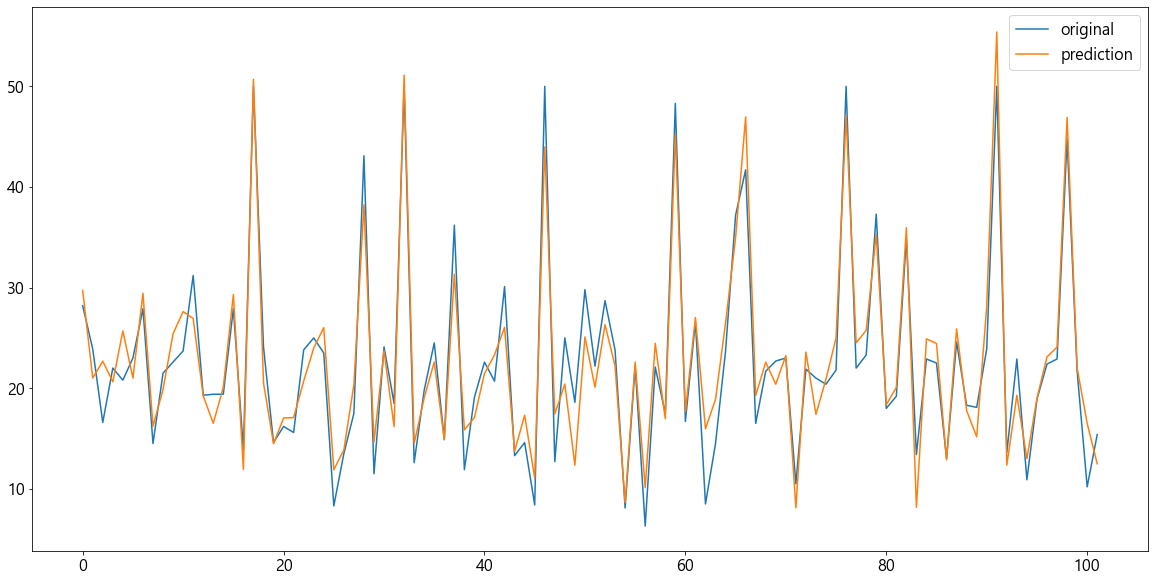

In [22]:
# 진짜 결과와 얼마나 유사한지 비교
plt.plot(y_test.values, label='original')
plt.plot(pred1, label='prediction')
plt.legend()
plt.show()
